# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

# Chapter 14: Data Transformation and Massaging

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Example 1 – Binary Coding of nominal attribute

In [2]:
report_df = pd.read_csv('WH Report_preprocessed.csv')
BM = report_df.year == 2019
report2019_df = report_df[BM]
report2019_df.set_index('Name',inplace=True)

In [3]:
bc_Continent = pd.get_dummies(report2019_df.Continent)
bc_Continent.head(5)

,Africa,Antarctica,Asia,Europe,North America,Oceania,South America
Name,,,,,,,
Afghanistan,0,0,1,0,0,0,0
Albania,0,0,0,1,0,0,0
Algeria,1,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,1
Armenia,0,0,0,1,0,0,0


In [4]:
from sklearn.cluster import KMeans
dimensions = ['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
              'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
              'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect']
Xs = report2019_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
Xs = Xs.join(bc_Continent/7)
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xs)

for i in range(3):
    BM = kmeans.labels_==i
    print('Cluster {}: {}'.format(i,Xs[BM].index.values))

Cluster 0: ['Australia' 'Austria' 'Bahrain' 'Canada' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Iceland' 'Ireland' 'Israel' 'Luxembourg' 'Malta'
 'Netherlands' 'New Zealand' 'Norway' 'Singapore' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States' 'Uruguay'
 'Uzbekistan']
Cluster 1: ['Afghanistan' 'Algeria' 'Bangladesh' 'Benin' 'Burkina Faso' 'Cambodia'
 'Cameroon' 'Chad' 'Ethiopia' 'Gabon' 'Ghana' 'Guinea' 'Haiti' 'India'
 'Iraq' 'Jordan' 'Kenya' 'Lebanon' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Morocco' 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Senegal' 'Sierra Leone' 'Tanzania' 'Togo' 'Tunisia' 'Uganda'
 'Zambia' 'Zimbabwe']
Cluster 2: ['Albania' 'Argentina' 'Armenia' 'Azerbaijan' 'Belarus' 'Belgium'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Georgia' 'Greece'
 'Guatemala' 

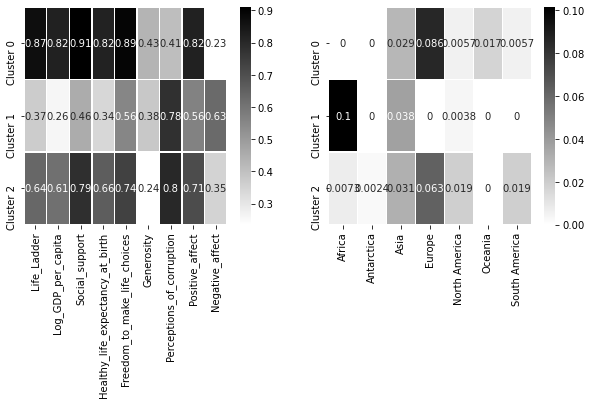

In [5]:
clusters = ['Cluster {}'.format(i) for i in range(3)]

Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].mean(axis=0)
    
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(Centroids[dimensions], linewidths=.5, 
            annot=True, cmap='binary')
plt.subplot(1,2,2)
sns.heatmap(Centroids[bc_Continent.columns],
            linewidths=.5, annot=True, cmap='binary')
plt.show()

To see this impact, remove the division by 7 run the clustering analysis, and create the heatmap of the centroid analysis to see this. 

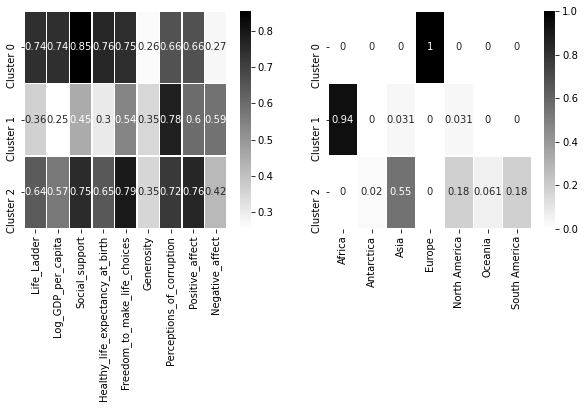

In [6]:
dimensions = ['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
              'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
              'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect']
Xs = report2019_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
Xs = Xs.join(bc_Continent)
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xs)

clusters = ['Cluster {}'.format(i) for i in range(3)]

Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].mean(axis=0)
    
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(Centroids[dimensions], linewidths=.5, annot=True, 
                    cmap='binary')
plt.subplot(1,2,2)
sns.heatmap(Centroids[bc_Continent.columns], linewidths=.5, annot=True, 
                    cmap='binary')
plt.show()

The reason for this two-fold visual is that the normalized numerical values are between zero and one and the binary coded values are between 0 and 0.14; without the separation, the heatmap would only show the normalized numerical as those values have a larger scale. Run the normal non-separated heatmap and see that for yourself.

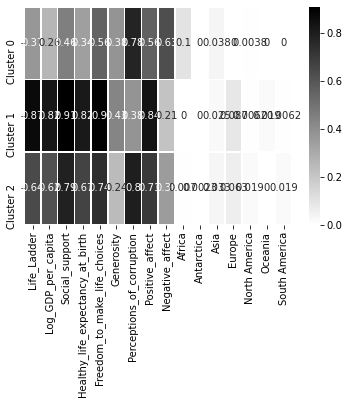

In [7]:
dimensions = ['Life_Ladder', 'Log_GDP_per_capita', 'Social_support',
              'Healthy_life_expectancy_at_birth', 'Freedom_to_make_life_choices',
              'Generosity', 'Perceptions_of_corruption', 'Positive_affect', 'Negative_affect']
Xs = report2019_df[dimensions]
Xs = (Xs - Xs.min())/(Xs.max()-Xs.min())
Xs = Xs.join(bc_Continent/7)
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xs)

clusters = ['Cluster {}'.format(i) for i in range(3)]

Centroids = pd.DataFrame(0.0, index =  clusters,
                        columns = Xs.columns)
for i,clst in enumerate(clusters):
    BM = kmeans.labels_==i
    Centroids.loc[clst] = Xs[BM].mean(axis=0)
    

sns.heatmap(Centroids, linewidths=.5, annot=True, 
                    cmap='binary')
plt.show()

### Example 3 – Discretization of Numerical attributes

In [8]:
adult_df = pd.read_csv('adult.csv')
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:xlabel='hoursPerWeek', ylabel='sex'>

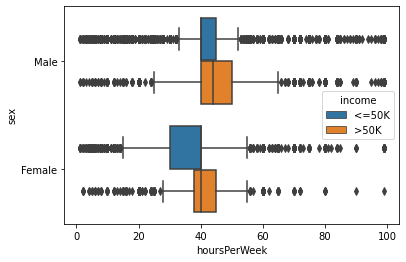

In [9]:
adult_df = pd.read_csv('adult.csv')
sns.boxplot(data=adult_df, y='sex', x='hoursPerWeek',hue='income')

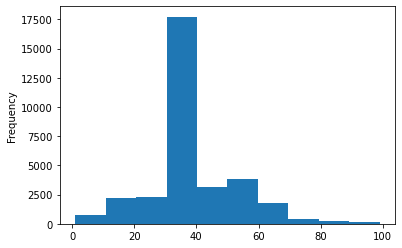

In [10]:
adult_df.hoursPerWeek.plot.hist()
plt.show()

In [11]:
adult_df['discretized_hoursPerWeek']=adult_df.hoursPerWeek.apply(lambda v: '>40' if v>40 else ('40' if v==40 else '<40'))

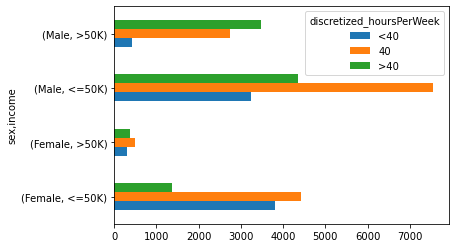

In [12]:
adult_df.groupby(['sex','income']).discretized_hoursPerWeek.value_counts().unstack()[['<40','40', '>40']].plot.barh()
plt.show()

## Types of Discretization

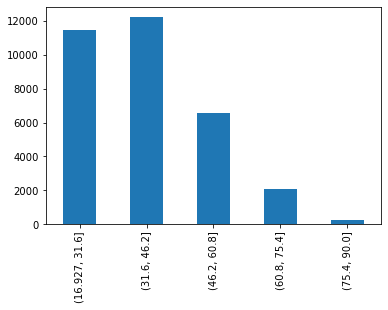

In [13]:
pd.cut(adult_df.age, bins = 5).value_counts().sort_index().plot.bar()
plt.show()

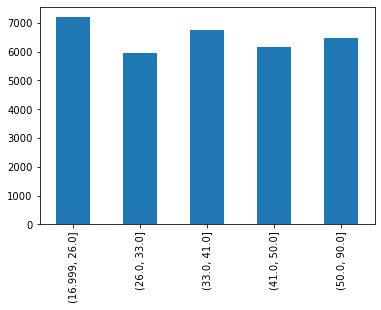

In [14]:
pd.qcut(adult_df.age,q=5,
        duplicates='drop').value_counts().sort_index().plot.bar()
plt.show()

### Example – Construct one transformed attribute from two attributes

In [15]:
person_df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
person_df.Index = person_df.Index.replace({0:'Extremely Weak', 1: 'Weak',2: 'Normal',3:'Overweight', 4:'Obesity',5:'Extreme Obesity'})
person_df.columns = ['Gender', 'Height', 'Weight', 'Condition']

In [16]:
person_df

,Gender,Height,Weight,Condition
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


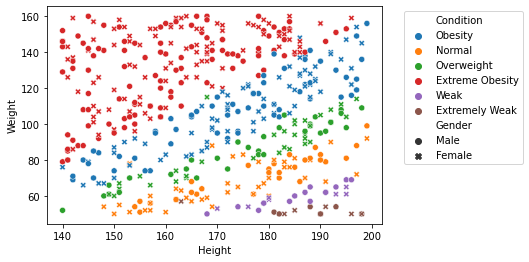

In [17]:
sns.scatterplot(data = person_df, x='Height',y='Weight',
                hue='Condition',style='Gender')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [18]:
person_df['BMI'] = person_df.apply(lambda r:r.Weight/((r.Height/100)**2),axis=1)

In [19]:
person_df

,Gender,Height,Weight,Condition,BMI
0,Male,174,96,Obesity,31.708284
1,Male,189,87,Normal,24.355421
2,Female,185,110,Obesity,32.140248
3,Female,195,104,Overweight,27.350427
4,Male,149,61,Overweight,27.476240
...,...,...,...,...,...
495,Female,150,153,Extreme Obesity,68.000000
496,Female,184,121,Obesity,35.739603
497,Female,141,136,Extreme Obesity,68.407022
498,Male,150,95,Extreme Obesity,42.222222


<AxesSubplot:>

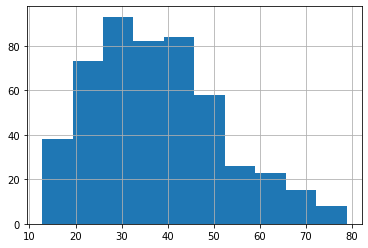

In [20]:
person_df.BMI.hist()

<AxesSubplot:>

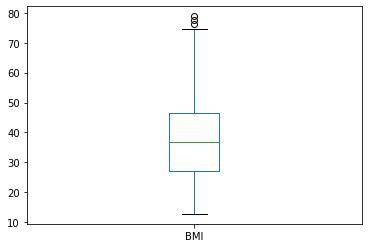

In [21]:
person_df.BMI.plot.box()

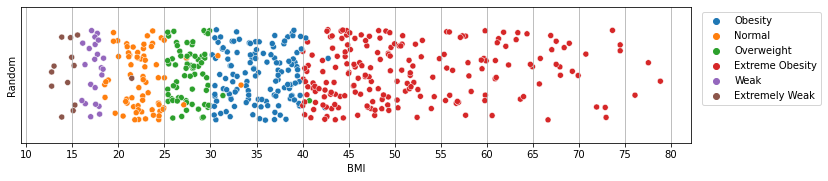

In [22]:
person_df['Random'] = np.random.random(len(person_df))

plt.figure(figsize=(12,2.5))
sns.scatterplot(data = person_df, x='BMI',y='Random',
                hue='Condition')
plt.ylim([-0.25,1.25])
plt.xticks(np.linspace(10,80,15))
plt.yticks([])
plt.grid()
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

## Log Transformation

In [23]:
country_df = pd.read_csv('GDP 2019 2020.csv')
country_df.set_index('Country Name',inplace=True)
country_df

,Country Code,2019,2020
Country Name,,,
Afghanistan,AFG,1.929110e+10,1.980707e+10
Angola,AGO,8.941719e+10,6.230691e+10
Albania,ALB,1.528661e+10,1.479962e+10
Argentina,ARG,4.450000e+11,3.830000e+11
Armenia,ARM,1.367280e+10,1.264546e+10
...,...,...,...
Vanuatu,VUT,9.303380e+08,8.547936e+08
Samoa,WSM,8.522502e+08,8.070272e+08
South Africa,ZAF,3.510000e+11,3.020000e+11


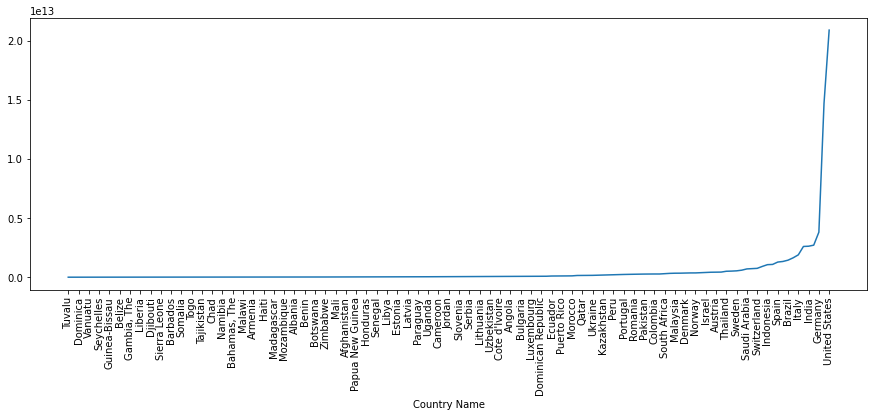

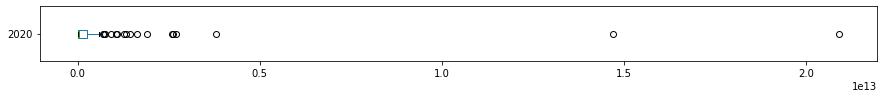

In [24]:
n_countries = len(country_df)
intervals = [i*2 for i in range(75)]

wdf = country_df[['2019','2020']].sort_values('2020')
wdf['2020'].plot(figsize=(15,5))

plt.xticks(intervals,wdf.iloc[intervals].index,rotation=90)
plt.show()

wdf['2020'].plot.box(vert=False,figsize = (15,1))
plt.show()

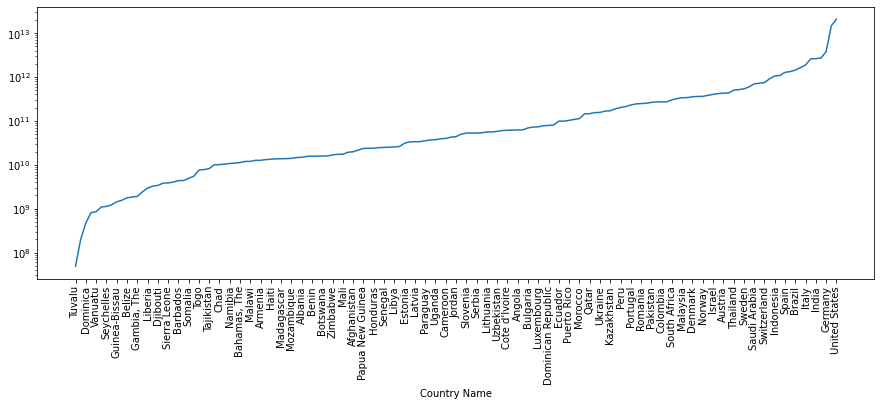

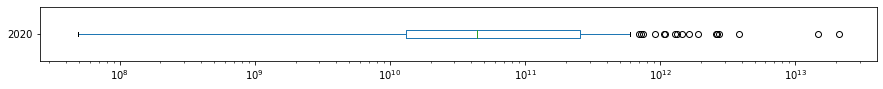

In [25]:
n_countries = len(country_df)
intervals = [i*2 for i in range(75)]

wdf = country_df[['2019','2020']].sort_values('2020')
wdf['2020'].plot(figsize=(15,5),logy=True)

plt.xticks(intervals,wdf.iloc[intervals].index,rotation=90)
plt.show()

wdf['2020'].plot.box(vert=False,figsize = (15,1),logx=True)
plt.show()

## Implementation – Doing it yourself

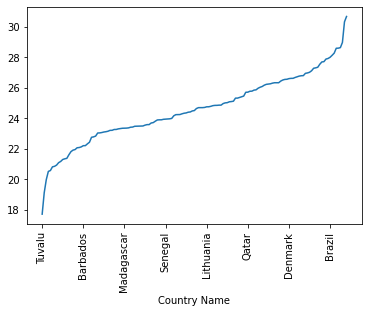

In [26]:
country_df['log_2020'] = np.log(country_df['2020'])
country_df.log_2020.sort_values().plot()
plt.xticks(rotation=90)
plt.show()

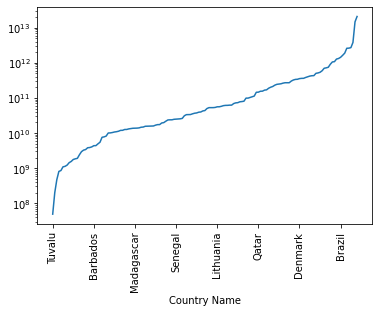

In [27]:
country_df['2020'].sort_values().plot(logy=True)
plt.xticks(rotation=90)
plt.show()

## Smoothing

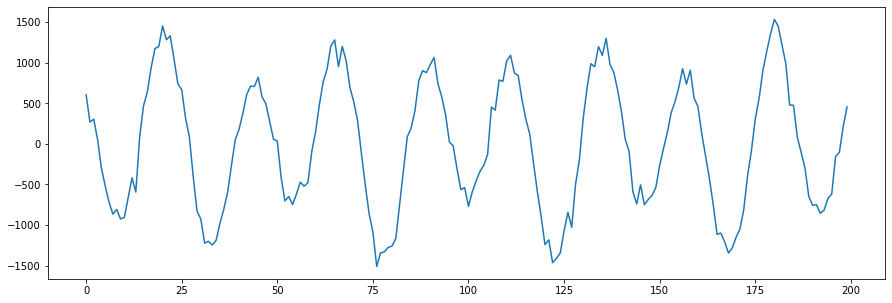

In [28]:
signal_df = pd.read_csv('Noise_data.csv')
signal_df.drop(columns='t',inplace=True)
signal_df.Signal.plot(figsize=(15,5))
plt.show()

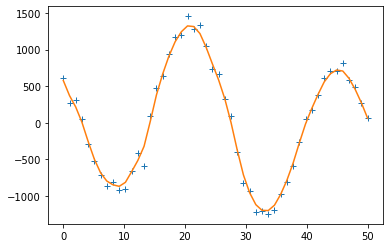

In [29]:
from statsmodels.nonparametric.kernel_regression import KernelReg

x = np.linspace(0,50,50)
y = signal_df.Signal.iloc[:50]
plt.plot(x, y, '+')

kr = KernelReg(y,x,'c')
y_pred, y_std = kr.fit(x)

plt.plot(x, y_pred)
plt.show()

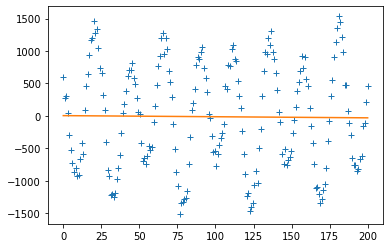

In [30]:
from statsmodels.nonparametric.kernel_regression import KernelReg

x = np.linspace(0,200,200)
y = signal_df.Signal
plt.plot(x, y, '+')

kr = KernelReg(y,x,'c')
y_pred, y_std = kr.fit(x)

plt.plot(x, y_pred)
plt.show()

## Rolling Data Smoothing

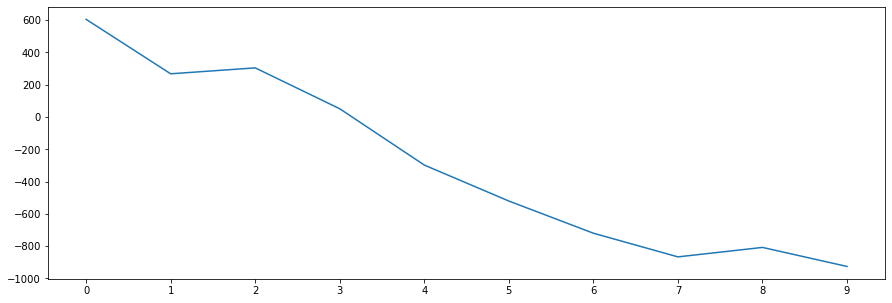

In [31]:
signal_df.Signal.iloc[:10].plot(figsize=(15,5))

plt.xticks([i for i in range(10)])
plt.show()

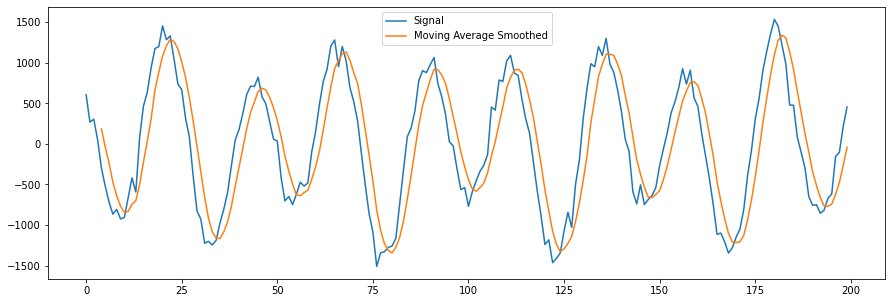

In [32]:
signal_df.Signal.plot(figsize=(15,5),label='Signal')
signal_df.Signal.rolling(window =5).mean().plot(label='Moving Average Smoothed')
plt.legend()
plt.show()

In [33]:
pd.DataFrame({'Signal':signal_df.Signal.iloc[:50],
              'Moving Average Smoothed':signal_df.Signal.iloc[:50].rolling(
                  window=5).mean()}).head(10)


,Signal,Moving Average Smoothed
0,605.340308,NaN
1,267.958658,NaN
2,304.652019,NaN
3,51.297364,NaN
4,-297.546288,186.340412
5,-520.492600,-38.826169
6,-719.919832,-236.401867
7,-866.546219,-470.641515
8,-807.907263,-642.482441
9,-925.817440,-768.136671


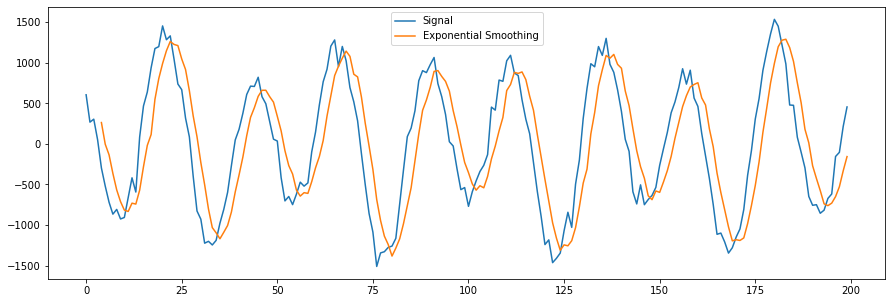

In [34]:
def ExpSmoothing(v):
    a=0.2
    yhat = v.iloc[0]
    for i in range(len(v)):
        yhat = a*v.iloc[i]  + (1-a)*yhat
    return yhat
signal_df.Signal.plot(figsize=(15,5),label='Signal')
signal_df.Signal.rolling(window=5).apply(
    ExpSmoothing).plot(label = 'Exponential Smoothing')
plt.legend()
plt.show()

### Binning

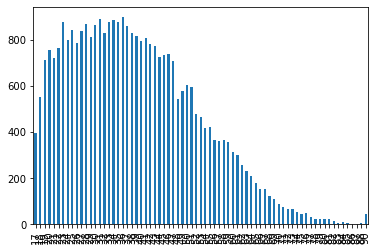

In [35]:
adult_df.age.value_counts().sort_index().plot.bar()
plt.show()

<AxesSubplot:>

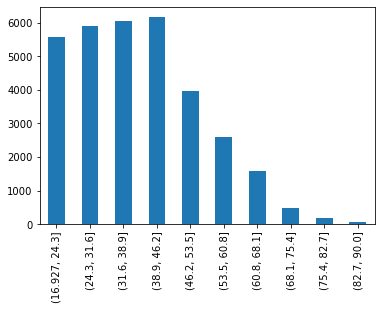

In [36]:
adult_df['age_binned']=pd.cut(adult_df.age,10)
adult_df.age_binned.value_counts().sort_index().plot.bar()

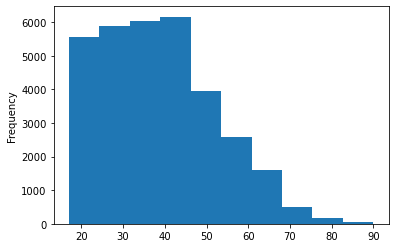

In [37]:
adult_df.age.plot.hist()
plt.show()